## Predicting Credit Card Approval of Customers using Machine Learning Algorithms

### Required Libraries

Here I have imported all of the necessary and required libraries which will be used in the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from xgboost import XGBClassifier

import itertools
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.facecolor'] = 'white'

### Reading the data files

In [2]:
# appliers personal information data file
df_application = pd.read_csv('application_record.csv')
# users' behaviors of credit card data file
df_credit = pd.read_csv('credit_record.csv')

### Data Exploration

Now, let's explore both the datasets like how they look, what is the shape of the data, how many null records are there and few more things.

In [3]:
df_application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
df_application.shape

(438557, 18)

In [5]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
# summary statistics of the data
df_application.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [7]:
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [8]:
df_credit.shape

(1048575, 3)

In [9]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


### Feature Engineering

In this step, I will analyze, clean and transform all of the features to use them in the Prediction Models

#### Creating a target variable

I choose users who overdue for more than 60 days as target risk users.

In [10]:
# Find the account opening month of all the users
acc_open_month = pd.DataFrame(df_credit.groupby(["ID"])["MONTHS_BALANCE"].agg(min))

In [11]:
# change the column name
acc_open_month = acc_open_month.rename(columns={"MONTHS_BALANCE": "begin_month"})

In [12]:
# join the application and account opening month datasets
df = pd.merge(df_application, acc_open_month, how = "left", on = "ID")

In [13]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0


In [14]:
# create a new column
df_credit['dep_value'] = None
# set the value of the feature to yes if the STATUS value is 2,3,4 and 5
df_credit['dep_value'][df_credit['STATUS'] =='2']='Yes'
df_credit['dep_value'][df_credit['STATUS'] =='3']='Yes'
df_credit['dep_value'][df_credit['STATUS'] =='4']='Yes'
df_credit['dep_value'][df_credit['STATUS'] =='5']='Yes'

This new column is to calculate the overdue time of customers so that we can create our target variable based on that.

In [15]:
df_credit.head()

,ID,MONTHS_BALANCE,STATUS,dep_value
0,5001711,0,X,None
1,5001711,-1,0,None
2,5001711,-2,0,None
3,5001711,-3,0,None
4,5001712,0,C,None


In [16]:
# group by ID and count the values in each column
cpunt = df_credit.groupby('ID').count()

In [17]:
# Count of values in each column grouped by ID
cpunt

,MONTHS_BALANCE,STATUS,dep_value
ID,,,
5001711,4,4,0
5001712,19,19,0
5001713,22,22,0
5001714,15,15,0
5001715,60,60,0
...,...,...,...
5150482,18,18,0
5150483,18,18,0
5150484,13,13,0


In [18]:
cpunt['dep_value'][cpunt['dep_value'] > 0]='Yes'
cpunt['dep_value'][cpunt['dep_value'] == 0]='No'

In [19]:
cpunt = cpunt[['dep_value']]

In [20]:
cpunt

,dep_value
ID,
5001711,No
5001712,No
5001713,No
5001714,No
5001715,No
...,...
5150482,No
5150483,No
5150484,No


In [21]:
# join the above dataframe with the main data
df = pd.merge(df, cpunt, how = 'inner', on = 'ID')

In [22]:
df['target'] = df['dep_value']

Target variable/column has been created at this point.

In [23]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,dep_value,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-15.0,No,No
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-14.0,No,No
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,No
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,No
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,No


In [24]:
df.loc[df['target']=='Yes','target']=1
df.loc[df['target']=='No','target']=0

In [25]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,dep_value,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-15.0,No,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-14.0,No,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0


In [26]:
print(cpunt['dep_value'].value_counts())

No     45318
Yes      667
Name: dep_value, dtype: int64


In [27]:
cpunt['dep_value'].value_counts(normalize=True)

No     0.985495
Yes    0.014505
Name: dep_value, dtype: float64

#### Renaming the columns

In [28]:
# rename the columns
df.rename(columns={'ID':'Id', 'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Property',
                         'CNT_CHILDREN':'ChldNo','AMT_INCOME_TOTAL':'inc',
                         'NAME_EDUCATION_TYPE':'edutp','NAME_FAMILY_STATUS':'famtp',
                        'NAME_HOUSING_TYPE':'houtp','FLAG_EMAIL':'email',
                         'NAME_INCOME_TYPE':'inctp','FLAG_WORK_PHONE':'wkphone',
                         'FLAG_PHONE':'phone','CNT_FAM_MEMBERS':'famsize',
                        'OCCUPATION_TYPE':'occyp'
                        },inplace=True)

In [29]:
df.head()

,Id,Gender,Car,Property,ChldNo,inc,inctp,edutp,famtp,houtp,...,DAYS_EMPLOYED,FLAG_MOBIL,wkphone,phone,email,occyp,famsize,begin_month,dep_value,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-15.0,No,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-14.0,No,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0


In [30]:
df.shape

(36457, 21)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             36457 non-null  int64  
 1   Gender         36457 non-null  object 
 2   Car            36457 non-null  object 
 3   Property       36457 non-null  object 
 4   ChldNo         36457 non-null  int64  
 5   inc            36457 non-null  float64
 6   inctp          36457 non-null  object 
 7   edutp          36457 non-null  object 
 8   famtp          36457 non-null  object 
 9   houtp          36457 non-null  object 
 10  DAYS_BIRTH     36457 non-null  int64  
 11  DAYS_EMPLOYED  36457 non-null  int64  
 12  FLAG_MOBIL     36457 non-null  int64  
 13  wkphone        36457 non-null  int64  
 14  phone          36457 non-null  int64  
 15  email          36457 non-null  int64  
 16  occyp          25134 non-null  object 
 17  famsize        36457 non-null  float64
 18  begin_

#### Dropping the Null values from the data

In [32]:
# drop all the null records
df.dropna()

,Id,Gender,Car,Property,ChldNo,inc,inctp,edutp,famtp,houtp,...,DAYS_EMPLOYED,FLAG_MOBIL,wkphone,phone,email,occyp,famsize,begin_month,dep_value,target
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-38.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2.0,-11.0,Yes,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-23.0,Yes,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-32.0,Yes,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,-655,1,0,0,0,Sales staff,2.0,-9.0,Yes,1


In [33]:
# drop all the records where there might be the value "NULL"
df = df.mask(df == 'NULL').dropna()

In [34]:
df.shape

(25134, 21)

#### Calculate IV (Information Value) and WoE (Weight of Evidence) Value

The IV values of the various types are the difference between the conditional positive rate and the conditional negative rate multiplied by the WOE value of the variable. The total IV value of the variable can be understood as the weighted sum of the conditional positive rate and the conditional negative rate difference. The IV value basically measures the variable's ability to predict.

In [35]:
# create a dataframe with column names and IV column
ivtable=pd.DataFrame(df.columns,columns=['variable'])
ivtable['IV']=None

In [36]:
ivtable

,variable,IV
0,Id,None
1,Gender,None
2,Car,None
3,Property,None
4,ChldNo,None
5,inc,None
6,inctp,None
7,edutp,None
8,famtp,None
9,houtp,None


In [37]:
# drop the unwanted columns from the dataframe created above
namelist = ['FLAG_MOBIL','begin_month','dep_value','target','Id']
for i in namelist:
    ivtable.drop(ivtable[ivtable['variable'] == i].index, inplace=True)

In [38]:
ivtable

,variable,IV
1,Gender,None
2,Car,None
3,Property,None
4,ChldNo,None
5,inc,None
6,inctp,None
7,edutp,None
8,famtp,None
9,houtp,None
10,DAYS_BIRTH,None


I used the below function from <a href="https://www.kaggle.com/puremath86/iv-woe-starter-for-python">here</a>

In [39]:
# Calculate information value
def calc_iv(df, feature, target, pr=False):
    lst = []
    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    
    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()
    print('This variable\'s IV is:',iv)
    print(df[feature].value_counts())
    return iv, data

#### Function to Encode the Numerical Features with more than two unique values

In [40]:
def convert_dummy(df, feature,rank=0):
    """
    This function encodes the numerical features which have more than two unique
    values
    """
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

#### Function to make the categories of required Numerical Features

In [41]:
def get_category(df, col, binsnum, labels, qcut = False):
    """
    This function makes the categories of a numeric column
    based on quantiles
    """
    if qcut:
        localdf = pd.qcut(df[col], q = binsnum, labels = labels) # quantile cut
    else:
        localdf = pd.cut(df[col], bins = binsnum, labels = labels) # equal-length cut
        
    localdf = pd.DataFrame(localdf)
    name = 'gp' + '_' + col
    localdf[name] = localdf[col]
    df = df.join(localdf[name])
    df[name] = df[name].astype(object)
    return df

#### Function to plot the confusion matrix for the Machine Learning models

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Here I will calculate the Information Value (IV), do Encoding and make the categories of the required features.

#### Gender

In [43]:
df['Gender'] = df['Gender'].replace(['F','M'],[0,1])
iv, data = calc_iv(df,'Gender','target')
ivtable.loc[ivtable['variable']=='Gender','IV']=iv
data.head()

This variable's IV is: 0.02520350452745081
0    15630
1     9504
Name: Gender, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Gender,0,15630,15400,230,0.621867,0.014715,0.623179,0.545024,0.134005,0.010473
1,Gender,1,9504,9312,192,0.378133,0.020202,0.376821,0.454976,-0.188475,0.014730


#### Car

In [44]:
df['Car'] = df['Car'].replace(['N','Y'],[0,1])
iv, data=calc_iv(df,'Car','target')
ivtable.loc[ivtable['variable']=='Car','IV']=iv
data.head()

This variable's IV is: 4.54248124999671e-06
0    14618
1    10516
Name: Car, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Car,0,14618,14373,245,0.581603,0.016760,0.58162,0.580569,0.00181,0.000002
1,Car,1,10516,10339,177,0.418397,0.016831,0.41838,0.419431,-0.00251,0.000003


#### Property

In [45]:
df['Property'] = df['Property'].replace(['N','Y'],[0,1])
iv, data=calc_iv(df,'Property','target')
ivtable.loc[ivtable['variable']=='Property','IV']=iv
data.head()

This variable's IV is: 0.02744070350168343
1    16461
0     8673
Name: Property, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Property,0,8673,8494,179,0.34507,0.020639,0.34372,0.424171,-0.210309,0.016920
1,Property,1,16461,16218,243,0.65493,0.014762,0.65628,0.575829,0.130777,0.010521


#### Phone

In [46]:
df['phone']=df['phone'].astype(str)
print(df['phone'].value_counts(normalize=True,sort=False))
df.drop(df[df['phone'] == 'nan' ].index, inplace=True)
iv, data=calc_iv(df,'phone','target')
ivtable.loc[ivtable['variable']=='phone','IV']=iv
data.head()

1    0.292791
0    0.707209
Name: phone, dtype: float64
This variable's IV is: 0.0005480495762639297
0    17775
1     7359
Name: phone, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,phone,0,17775,17481,294,0.707209,0.016540,0.707389,0.696682,0.015251,0.000163
1,phone,1,7359,7231,128,0.292791,0.017394,0.292611,0.303318,-0.035937,0.000385


#### Email

In [47]:
print(df['email'].value_counts(normalize=True,sort=False))
df['email']=df['email'].astype(str)
iv, data=calc_iv(df,'email','target')
ivtable.loc[ivtable['variable']=='email','IV']=iv
data.head()

0    0.89934
1    0.10066
Name: email, dtype: float64
This variable's IV is: 1.7343581493999816e-05
0    22604
1     2530
Name: email, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,email,0,22604,22225,379,0.89934,0.016767,0.899361,0.898104,0.001398,0.000002
1,email,1,2530,2487,43,0.10066,0.016996,0.100639,0.101896,-0.012407,0.000016


#### Work Phone

In [48]:
df['wkphone']=df['wkphone'].astype(str)
iv, data = calc_iv(df,'wkphone','target')
df.drop(df[df['wkphone'] == 'nan' ].index, inplace=True)
ivtable.loc[ivtable['variable']=='wkphone','IV']=iv
data.head()

This variable's IV is: 0.002042429795148461
0    18252
1     6882
Name: wkphone, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,wkphone,0,18252,17954,298,0.726188,0.016327,0.72653,0.706161,0.028436,0.000579
1,wkphone,1,6882,6758,124,0.273812,0.018018,0.27347,0.293839,-0.071838,0.001463


#### Number of Children

In [49]:
df.loc[df['ChldNo'] >= 2, 'ChldNo'] = 'More than 2'
print(df['ChldNo'].value_counts(sort=False))

0              15908
1               6118
More than 2     3108
Name: ChldNo, dtype: int64


In [50]:
iv, data=calc_iv(df,'ChldNo','target')
ivtable.loc[ivtable['variable']=='ChldNo','IV']=iv
data.head()

This variable's IV is: 0.0011214542503301935
0              15908
1               6118
More than 2     3108
Name: ChldNo, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,ChldNo,0,15908,15635,273,0.632928,0.017161,0.632689,0.646919,-0.022243,0.000317
1,ChldNo,1,6118,6021,97,0.243415,0.015855,0.243647,0.229858,0.058259,0.000803
2,ChldNo,More than 2,3108,3056,52,0.123657,0.016731,0.123665,0.123223,0.003580,0.000002


In [51]:
df.head(20)

,Id,Gender,Car,Property,ChldNo,inc,inctp,edutp,famtp,houtp,...,DAYS_EMPLOYED,FLAG_MOBIL,wkphone,phone,email,occyp,famsize,begin_month,dep_value,target
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0
5,5008810,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0
6,5008811,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-38.0,No,0
10,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,-769,1,1,1,1,Accountants,2.0,-5.0,No,0
11,5112956,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,-769,1,1,1,1,Accountants,2.0,-42.0,No,0
12,5008819,1,1,1,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-1194,1,0,0,0,Laborers,2.0,-17.0,No,0
13,5008820,1,1,1,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-1194,1,0,0,0,Laborers,2.0,-16.0,No,0
14,5008821,1,1,1,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-1194,1,0,0,0,Laborers,2.0,-8.0,No,0


In [52]:
df = convert_dummy(df, 'ChldNo')

In [53]:
df.head(20)

,Id,Gender,Car,Property,inc,inctp,edutp,famtp,houtp,DAYS_BIRTH,...,wkphone,phone,email,occyp,famsize,begin_month,dep_value,target,ChldNo_1,ChldNo_More than 2
2,5008806,1,1,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,...,0,0,0,Security staff,2.0,-29.0,No,0,0,0
3,5008808,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,0,1,1,Sales staff,1.0,-4.0,No,0,0,0
4,5008809,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,0,1,1,Sales staff,1.0,-26.0,No,0,0,0
5,5008810,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,0,1,1,Sales staff,1.0,-26.0,No,0,0,0
6,5008811,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,0,1,1,Sales staff,1.0,-38.0,No,0,0,0
10,5008815,1,1,1,270000.0,Working,Higher education,Married,House / apartment,-16872,...,1,1,1,Accountants,2.0,-5.0,No,0,0,0
11,5112956,1,1,1,270000.0,Working,Higher education,Married,House / apartment,-16872,...,1,1,1,Accountants,2.0,-42.0,No,0,0,0
12,5008819,1,1,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17778,...,0,0,0,Laborers,2.0,-17.0,No,0,0,0
13,5008820,1,1,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17778,...,0,0,0,Laborers,2.0,-16.0,No,0,0,0
14,5008821,1,1,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17778,...,0,0,0,Laborers,2.0,-8.0,No,0,0,0


#### Annual Income

(2.544, 18.18]      14663
(18.18, 33.66]       8464
(33.66, 49.14]       1637
(49.14, 64.62]        175
(64.62, 80.1]         124
(80.1, 95.58]          50
(95.58, 111.06]         4
(111.06, 126.54]        3
(126.54, 142.02]        6
(142.02, 157.5]         8
Name: inc, dtype: int64


<AxesSubplot:ylabel='Frequency'>

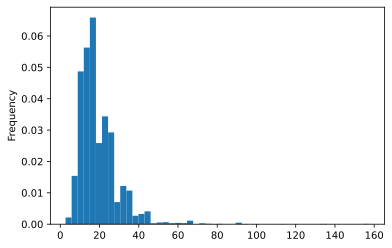

In [54]:
df['inc']=df['inc'].astype(object)
df['inc'] = df['inc']/10000 
print(df['inc'].value_counts(bins=10,sort=False))
df['inc'].plot(kind='hist',bins=50,density=True)

In [55]:
df = get_category(df,'inc', 3, ["low","medium", "high"], qcut = True)
iv, data = calc_iv(df,'gp_inc','target')
ivtable.loc[ivtable['variable']=='inc','IV']=iv
data.head()

This variable's IV is: 0.0024219962221596752
low       8996
high      8244
medium    7894
Name: gp_inc, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gp_inc,high,8244,8096,148,0.328002,0.017952,0.327614,0.350711,-0.068126,0.001573
1,gp_inc,low,8996,8849,147,0.357922,0.016341,0.358085,0.348341,0.027588,0.000269
2,gp_inc,medium,7894,7767,127,0.314077,0.016088,0.314301,0.300948,0.043413,0.000580


In [56]:
df.head()

,Id,Gender,Car,Property,inc,inctp,edutp,famtp,houtp,DAYS_BIRTH,...,phone,email,occyp,famsize,begin_month,dep_value,target,ChldNo_1,ChldNo_More than 2,gp_inc
2,5008806,1,1,1,11.25,Working,Secondary / secondary special,Married,House / apartment,-21474,...,0,0,Security staff,2.0,-29.0,No,0,0,0,low
3,5008808,0,0,1,27,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,1,Sales staff,1.0,-4.0,No,0,0,0,high
4,5008809,0,0,1,27,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,1,Sales staff,1.0,-26.0,No,0,0,0,high
5,5008810,0,0,1,27,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,1,Sales staff,1.0,-26.0,No,0,0,0,high
6,5008811,0,0,1,27,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,1,Sales staff,1.0,-38.0,No,0,0,0,high


In [57]:
df = convert_dummy(df,'gp_inc')

In [58]:
df.head()

,Id,Gender,Car,Property,inc,inctp,edutp,famtp,houtp,DAYS_BIRTH,...,email,occyp,famsize,begin_month,dep_value,target,ChldNo_1,ChldNo_More than 2,gp_inc_high,gp_inc_medium
2,5008806,1,1,1,11.25,Working,Secondary / secondary special,Married,House / apartment,-21474,...,0,Security staff,2.0,-29.0,No,0,0,0,0,0
3,5008808,0,0,1,27,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,Sales staff,1.0,-4.0,No,0,0,0,1,0
4,5008809,0,0,1,27,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,Sales staff,1.0,-26.0,No,0,0,0,1,0
5,5008810,0,0,1,27,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,Sales staff,1.0,-26.0,No,0,0,0,1,0
6,5008811,0,0,1,27,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,Sales staff,1.0,-38.0,No,0,0,0,1,0


#### Age

(19.951999999999998, 24.7]    0.025066
(24.7, 29.4]                  0.134280
(29.4, 34.1]                  0.169770
(34.1, 38.8]                  0.140805
(38.8, 43.5]                  0.173072
(43.5, 48.2]                  0.141880
(48.2, 52.9]                  0.099069
(52.9, 57.6]                  0.076550
(57.6, 62.3]                  0.032585
(62.3, 67.0]                  0.006923
Name: Age, dtype: float64


<AxesSubplot:ylabel='Frequency'>

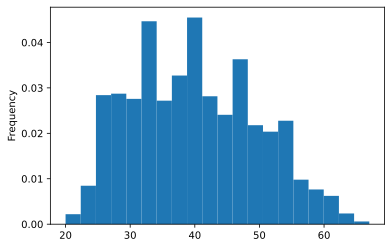

In [59]:
df['Age']=-(df['DAYS_BIRTH'])//365	
print(df['Age'].value_counts(bins=10,normalize=True,sort=False))
df['Age'].plot(kind='hist',bins=20,density=True)

In [60]:
df = get_category(df,'Age',5, ["lowest","low","medium","high","highest"])
iv, data = calc_iv(df,'gp_Age','target')
ivtable.loc[ivtable['variable']=='DAYS_BIRTH','IV'] = iv
data.head()

This variable's IV is: 0.06593513858884348
medium     7916
low        7806
high       4414
lowest     4005
highest     993
Name: gp_Age, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gp_Age,high,4414,4323,91,0.175619,0.020616,0.174935,0.215640,-0.209194,0.008515
1,gp_Age,highest,993,989,4,0.039508,0.004028,0.040021,0.009479,1.440361,0.043992
2,gp_Age,low,7806,7686,120,0.310575,0.015373,0.311023,0.284360,0.089625,0.002390
3,gp_Age,lowest,4005,3921,84,0.159346,0.020974,0.158668,0.199052,-0.226754,0.009157
4,gp_Age,medium,7916,7793,123,0.314952,0.015538,0.315353,0.291469,0.078758,0.001881


In [61]:
df = convert_dummy(df,'gp_Age')

#### Working Years

<AxesSubplot:ylabel='Frequency'>

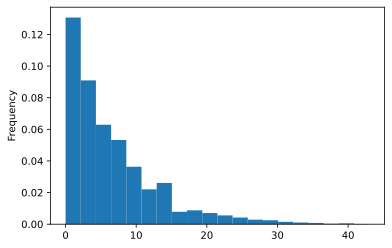

In [62]:
df['worktm']=-(df['DAYS_EMPLOYED'])//365	
df[df['worktm']<0] = np.nan # replace by na
df['DAYS_EMPLOYED']
df['worktm'].fillna(df['worktm'].mean(),inplace=True) #replace na by mean
df['worktm'].plot(kind='hist',bins=20,density=True)

In [63]:
df = get_category(df,'worktm',5, ["lowest","low","medium","high","highest"])
iv, data=calc_iv(df,'gp_worktm','target')
ivtable.loc[ivtable['variable']=='DAYS_EMPLOYED','IV']=iv
data.head()

This variable's IV is: 0.04022152230816303
lowest     18254
low         4987
medium      1378
high         425
highest       90
Name: gp_worktm, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gp_worktm,high,425,423,2,0.016909,0.004706,0.017117,0.004739,1.284186,0.015895
1,gp_worktm,highest,90,90,0,0.003581,0.000000,0.003642,0.000000,0.000000,0.000000
2,gp_worktm,low,4987,4921,66,0.198416,0.013234,0.199134,0.156398,0.241573,0.010324
3,gp_worktm,lowest,18254,17916,338,0.726267,0.018516,0.724992,0.800948,-0.099635,0.007568
4,gp_worktm,medium,1378,1362,16,0.054826,0.011611,0.055115,0.037915,0.374082,0.006434


In [64]:
df = convert_dummy(df,'gp_worktm')

#### Family Size

In [65]:
df['famsize']=df['famsize'].astype(int)
df['famsizegp']=df['famsize']
df['famsizegp']=df['famsizegp'].astype(object)
df.loc[df['famsizegp']>=3,'famsizegp']='More than 3'
iv, data=calc_iv(df,'famsizegp','target')
ivtable.loc[ivtable['variable']=='famsize','IV']=iv
data.head()

This variable's IV is: 0.006156138510778323
2              12697
More than 3     8174
1               4263
Name: famsizegp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,famsizegp,1,4263,4179,84,0.169611,0.019704,0.169108,0.199052,-0.163028,0.004882
1,famsizegp,2,12697,12489,208,0.505172,0.016382,0.505382,0.492891,0.025027,0.000313
2,famsizegp,More than 3,8174,8044,130,0.325217,0.015904,0.325510,0.308057,0.055108,0.000962


In [66]:
df = convert_dummy(df,'famsizegp')

#### Income Type

In [67]:
print(df['inctp'].value_counts(normalize=True,sort=False))
df.loc[df['inctp']=='Pensioner','inctp']='State servant'
df.loc[df['inctp']=='Student','inctp']='State servant'
iv, data=calc_iv(df,'inctp','target')
ivtable.loc[ivtable['variable']=='inctp','IV']=iv
data.head()

State servant           0.096960
Pensioner               0.000517
Commercial associate    0.280576
Working                 0.621549
Student                 0.000398
Name: inctp, dtype: float64
This variable's IV is: 5.159303327851404e-05
Working                 15622
Commercial associate     7052
State servant            2460
Name: inctp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,inctp,Commercial associate,7052,6933,119,0.280576,0.016875,0.280552,0.281991,-0.005115,0.000007
1,inctp,State servant,2460,2418,42,0.097875,0.017073,0.097847,0.099526,-0.017013,0.000029
2,inctp,Working,15622,15361,261,0.621549,0.016707,0.621601,0.618483,0.005028,0.000016


In [68]:
df = convert_dummy(df,'inctp')

#### Occupation Type

In [69]:
df.loc[(df['occyp']=='Cleaning staff') | (df['occyp']=='Cooking staff') | (df['occyp']=='Drivers') | (df['occyp']=='Laborers') | (df['occyp']=='Low-skill Laborers') | (df['occyp']=='Security staff') | (df['occyp']=='Waiters/barmen staff'),'occyp']='Laborwk'
df.loc[(df['occyp']=='Accountants') | (df['occyp']=='Core staff') | (df['occyp']=='HR staff') | (df['occyp']=='Medicine staff') | (df['occyp']=='Private service staff') | (df['occyp']=='Realty agents') | (df['occyp']=='Sales staff') | (df['occyp']=='Secretaries'),'occyp']='officewk'
df.loc[(df['occyp']=='Managers') | (df['occyp']=='High skill tech staff') | (df['occyp']=='IT staff'),'occyp']='hightecwk'
print(df['occyp'].value_counts())
iv, data=calc_iv(df,'occyp','target')
ivtable.loc[ivtable['variable']=='occyp','IV']=iv
data.head()

Laborwk      10496
officewk     10183
hightecwk     4455
Name: occyp, dtype: int64
This variable's IV is: 0.004820472062853304
Laborwk      10496
officewk     10183
hightecwk     4455
Name: occyp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,occyp,Laborwk,10496,10311,185,0.417602,0.017626,0.417247,0.438389,-0.049428,0.001045
1,occyp,hightecwk,4455,4375,80,0.177250,0.017957,0.177039,0.189573,-0.068404,0.000857
2,occyp,officewk,10183,10026,157,0.405148,0.015418,0.405714,0.372038,0.086652,0.002918


In [70]:
df = convert_dummy(df,'occyp')

#### House Type

In [71]:
iv, data=calc_iv(df,'houtp','target')
ivtable.loc[ivtable['variable']=='houtp','IV']=iv
data.head()

This variable's IV is: 0.0073275026880227365
House / apartment      22102
With parents            1430
Municipal apartment      812
Rented apartment         439
Office apartment         199
Co-op apartment          152
Name: houtp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,houtp,Co-op apartment,152,149,3,0.006048,0.019737,0.006029,0.007109,-0.164705,0.000178
1,houtp,House / apartment,22102,21738,364,0.879367,0.016469,0.879654,0.862559,0.019624,0.000335
2,houtp,Municipal apartment,812,793,19,0.032307,0.023399,0.032090,0.045024,-0.338655,0.004380
3,houtp,Office apartment,199,194,5,0.007918,0.025126,0.007850,0.011848,-0.411619,0.001646
4,houtp,Rented apartment,439,433,6,0.017466,0.013667,0.017522,0.014218,0.208939,0.000690


In [72]:
df = convert_dummy(df,'houtp')

#### Education

In [73]:
df.loc[df['edutp']=='Academic degree','edutp']='Higher education'
iv, data=calc_iv(df,'edutp','target')
ivtable.loc[ivtable['variable']=='edutp','IV']=iv
data.head()

This variable's IV is: 0.010361794017679489
Secondary / secondary special    16808
Higher education                  7146
Incomplete higher                  993
Lower secondary                    187
Name: edutp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,edutp,Higher education,7146,7018,128,0.284316,0.017912,0.283992,0.303318,-0.065836,0.001272
1,edutp,Incomplete higher,993,972,21,0.039508,0.021148,0.039333,0.049763,-0.235206,0.002453
2,edutp,Lower secondary,187,181,6,0.007440,0.032086,0.007324,0.014218,-0.663301,0.004573
3,edutp,Secondary / secondary special,16808,16541,267,0.668736,0.015885,0.669351,0.632701,0.056310,0.002064


In [74]:
df = convert_dummy(df,'edutp')

#### Marital Status

In [75]:
print(df['famtp'].value_counts(normalize=True,sort=False))
iv, data=calc_iv(df,'famtp','target')
ivtable.loc[ivtable['variable']=='famtp','IV']=iv
data.head()

Single / not married    0.137065
Married                 0.696626
Widow                   0.023076
Civil marriage          0.084865
Separated               0.058367
Name: famtp, dtype: float64
This variable's IV is: 0.043137115423127946
Married                 17509
Single / not married     3445
Civil marriage           2133
Separated                1467
Widow                     580
Name: famtp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,famtp,Civil marriage,2133,2101,32,0.084865,0.015002,0.085019,0.075829,0.114394,0.001051
1,famtp,Married,17509,17232,277,0.696626,0.015820,0.697313,0.656398,0.060467,0.002474
2,famtp,Separated,1467,1452,15,0.058367,0.010225,0.058757,0.035545,0.502608,0.011666
3,famtp,Single / not married,3445,3362,83,0.137065,0.024093,0.136047,0.196682,-0.368588,0.022349
4,famtp,Widow,580,565,15,0.023076,0.025862,0.022863,0.035545,-0.441263,0.005596


In [76]:
df = convert_dummy(df,'famtp')

In [77]:
df.head()

,Id,Gender,Car,Property,inc,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,wkphone,phone,...,houtp_Office apartment,houtp_Rented apartment,houtp_With parents,edutp_Higher education,edutp_Incomplete higher,edutp_Lower secondary,famtp_Civil marriage,famtp_Separated,famtp_Single / not married,famtp_Widow
2,5008806.0,1.0,1.0,1.0,11.25,-21474.0,-1134.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5008808.0,0.0,0.0,1.0,27,-19110.0,-3051.0,1.0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,5008809.0,0.0,0.0,1.0,27,-19110.0,-3051.0,1.0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,5008810.0,0.0,0.0,1.0,27,-19110.0,-3051.0,1.0,0,1,...,0,0,0,0,0,0,0,0,1,0
6,5008811.0,0.0,0.0,1.0,27,-19110.0,-3051.0,1.0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [78]:
ivtable

,variable,IV
1,Gender,0.0252035
2,Car,4.54248e-06
3,Property,0.0274407
4,ChldNo,0.00112145
5,inc,0.002422
6,inctp,5.1593e-05
7,edutp,0.0103618
8,famtp,0.0431371
9,houtp,0.0073275
10,DAYS_BIRTH,0.0659351


Relationship between IV value and predictive power

| IV| Ability to predict | 
|:------|:------:| 
| <0.02 | Almost no predictive power | 
|0.02~0.1 |weak predictive power|
|0.1~0.3|Moderate predictive power|
|0.3~0.5|Strong predictive power|
|>0.5|Predictive power is too strong, need to check variables| 

In [79]:
ivtable=ivtable.sort_values(by='IV',ascending=False)
ivtable.loc[ivtable['variable']=='DAYS_BIRTH','variable']='agegp'
ivtable.loc[ivtable['variable']=='DAYS_EMPLOYED','variable']='worktmgp'
ivtable.loc[ivtable['variable']=='inc','variable']='incgp'
ivtable

,variable,IV
10,agegp,0.0659351
8,famtp,0.0431371
11,worktmgp,0.0402215
3,Property,0.0274407
1,Gender,0.0252035
7,edutp,0.0103618
9,houtp,0.0073275
17,famsize,0.00615614
16,occyp,0.00482047
5,incgp,0.002422


### Using different Machine Learning Algorithms

#### Split the data into Train and Test sets

In [80]:
df.columns

Index(['Id', 'Gender', 'Car', 'Property', 'inc', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'wkphone', 'phone', 'email', 'famsize', 'begin_month',
       'dep_value', 'target', 'ChldNo_1', 'ChldNo_More than 2', 'gp_inc_high',
       'gp_inc_medium', 'Age', 'gp_Age_high', 'gp_Age_highest', 'gp_Age_low',
       'gp_Age_lowest', 'worktm', 'gp_worktm_high', 'gp_worktm_highest',
       'gp_worktm_low', 'gp_worktm_medium', 'famsizegp_1',
       'famsizegp_More than 3', 'inctp_Commercial associate',
       'inctp_State servant', 'occyp_hightecwk', 'occyp_officewk',
       'houtp_Co-op apartment', 'houtp_Municipal apartment',
       'houtp_Office apartment', 'houtp_Rented apartment',
       'houtp_With parents', 'edutp_Higher education',
       'edutp_Incomplete higher', 'edutp_Lower secondary',
       'famtp_Civil marriage', 'famtp_Separated', 'famtp_Single / not married',
       'famtp_Widow'],
      dtype='object')

In [81]:
Y = df["target"]
X = df[["Gender","Property", "ChldNo_1", "ChldNo_More than 2", "wkphone", 'gp_Age_high', 'gp_Age_highest', 'gp_Age_low',
       'gp_Age_lowest', 'gp_worktm_high', 'gp_worktm_highest',
       'gp_worktm_low', 'gp_worktm_medium', 'occyp_hightecwk', 'occyp_officewk', 'famsizegp_1',
       'famsizegp_More than 3', 'houtp_Co-op apartment', 'houtp_Municipal apartment',
       'houtp_Office apartment', 'houtp_Rented apartment',
       'houtp_With parents', 'edutp_Higher education',
       'edutp_Incomplete higher', 'edutp_Lower secondary', 'famtp_Civil marriage', 'famtp_Separated', 'famtp_Single / not married',
       'famtp_Widow']]

#### Overcome sample imbalance problem

In [82]:
Y = Y.astype('int')
X_balanced,Y_balanced = SMOTE().fit_resample(X,Y)
X_balanced = pd.DataFrame(X_balanced, columns = X.columns)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced,Y_balanced, 
                                                    stratify=Y_balanced, test_size=0.3,
                                                    random_state = 9056)

### Logistic Regression

Accuracy Score is 0.64338
F1 Score : 0.6702419555999002
Precision : 0.6232892600324751
Recall : 0.7248448880496359
ROC_AUC: 0.6999325109015533
      0     1
0  4166  3248
1  2040  5374
[[0.5619099  0.4380901 ]
 [0.27515511 0.72484489]]


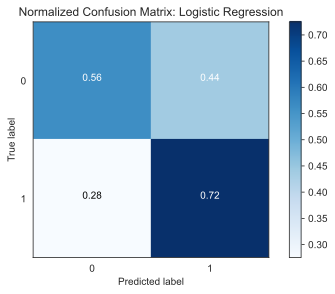

In [84]:
model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

probs = model.predict_proba(X_test)
probs = probs[:, 1]

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print("F1 Score :", f1_score(y_test, y_predict))
print("Precision :", precision_score(y_test, y_predict))
print("Recall :", recall_score(y_test, y_predict))

auc = roc_auc_score(y_test, probs)
print("ROC_AUC:", auc)

print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Logistic Regression')

### Decision Tree

Accuracy Score is 0.81629
F1 Score : 0.8217510797016097
Precision : 0.7980427046263345
Recall : 0.8469112489884003
ROC_AUC: 0.9068621970012916
      0     1
0  5825  1589
1  1135  6279
[[0.78567575 0.21432425]
 [0.15308875 0.84691125]]


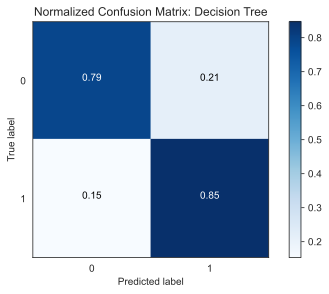

In [85]:
model = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
probs = model.predict_proba(X_test)
probs = probs[:, 1]

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print("F1 Score :", f1_score(y_test, y_predict))
print("Precision :", precision_score(y_test, y_predict))
print("Recall :", recall_score(y_test, y_predict))
auc = roc_auc_score(y_test, probs)
print("ROC_AUC:", auc)
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Decision Tree')

### Random Forest

Accuracy Score is 0.83774
F1 Score : 0.8416271721958926
Precision : 0.8219336590383132
Recall : 0.8622875640679795
ROC_AUC: 0.926841840934215
      0     1
0  6029  1385
1  1021  6393
[[0.81319126 0.18680874]
 [0.13771244 0.86228756]]


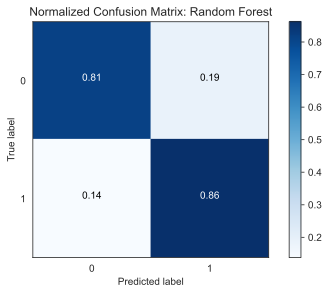

In [86]:
model = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
probs = model.predict_proba(X_test)
probs = probs[:, 1]

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print("F1 Score :", f1_score(y_test, y_predict))
print("Precision :", precision_score(y_test, y_predict))
print("Recall :", recall_score(y_test, y_predict))
auc = roc_auc_score(y_test, probs)
print("ROC_AUC:", auc)
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Random Forest')

### SVM

Accuracy Score is 0.62948
F1 Score : 0.6777712609970674
Precision : 0.599626400996264
Recall : 0.779336390612355
ROC_AUC: 0.6851449630249902
      0     1
0  3556  3858
1  1636  5778
[[0.47963313 0.52036687]
 [0.22066361 0.77933639]]


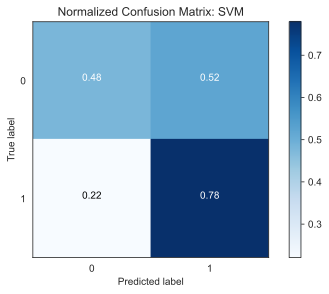

In [87]:
model = svm.SVC(C = 0.8,
                kernel='linear', probability=True)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
probs = model.predict_proba(X_test)
probs = probs[:, 1]

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print("F1 Score :", f1_score(y_test, y_predict))
print("Precision :", precision_score(y_test, y_predict)) 
print("Recall :", recall_score(y_test, y_predict))
auc = roc_auc_score(y_test, probs)
print("ROC_AUC:", auc)
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: SVM')

In [88]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()

In [89]:
# Encode the categorical features to use in XGBoost
categorical_features = ['wkphone']
for c in categorical_features:
    X_train[c] = lbl.fit_transform(X_train[c].astype('str'))
    X_test[c] = lbl.fit_transform(X_test[c].astype('str'))

### XGBoost

[12:33:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score is 0.82007
F1 Score : 0.8376141205112599
Precision : 0.7631987577639752
Recall : 0.9281089830051255
ROC_AUC: 0.8941859461561541
      0     1
0  5279  2135
1   533  6881
[[0.71203129 0.28796871]
 [0.07189102 0.92810898]]


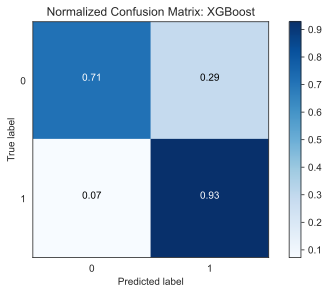

In [90]:
model = XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
probs = model.predict_proba(X_test)
probs = probs[:, 1]

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print("F1 Score :", f1_score(y_test, y_predict))
print("Precision :", precision_score(y_test, y_predict))
print("Recall :", recall_score(y_test, y_predict))
auc = roc_auc_score(y_test, probs)
print("ROC_AUC:", auc)
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: XGBoost')

In [91]:
# plot the importance of features
def plot_importance(classifer, x_train, point_size = 25):
    '''plot feature importance'''
    values = sorted(zip(x_train.columns, classifer.feature_importances_), key = lambda x: x[1] * -1)
    imp = pd.DataFrame(values,columns = ["Name", "Score"])
    imp.sort_values(by = 'Score',inplace = True)
    sns.scatterplot(x = 'Score',y='Name', linewidth = 0,
                data = imp,s = point_size, color='red').set(
    xlabel='importance', 
    ylabel='features')

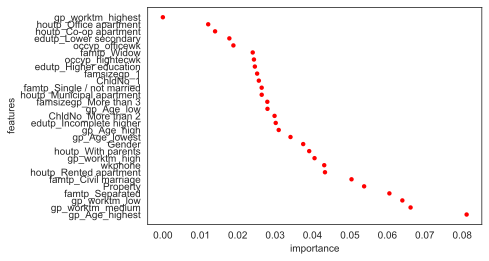

In [92]:
plot_importance(model, X_train, 20)  

### KNN

KNN Accuracy Score is 0.76571
F1 Score : 0.7950442477876105
Precision : 0.7065855704697986
Recall : 0.9088211491772322
ROC_AUC: 0.782379285349446
      0     1
0  4616  2798
1   676  6738
[[0.62260588 0.37739412]
 [0.09117885 0.90882115]]


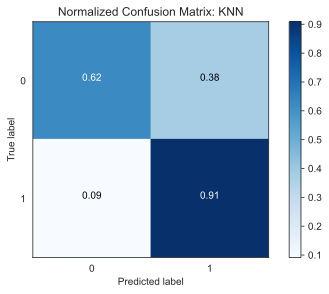

In [93]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
probs = model.predict_proba(X_test)
probs = probs[:, 1]

print('KNN Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print("F1 Score :", f1_score(y_test, y_predict))
print("Precision :", precision_score(y_test, y_predict))
print("Recall :", recall_score(y_test, y_predict))
auc = roc_auc_score(y_test, probs)
print("ROC_AUC:", auc)
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: KNN')